In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import tifffile

ROOT = Path("..").resolve()
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

from src.roi_analysis import (
    compute_centroids_df,
    compute_neighbor_stats,
    get_pixel_size,
    get_stub,
    load_segmentation,
    run_batch,
)


In [2]:
DATAFOLDER = Path("D:/TestData/fenestrations")
files = ["FAS_24_ME_09.tif", "FAS_24_ME_10.tif", "FAS_24_ME_11.tif"]

stubs = [get_stub(file) for file in files]
OUTFILE = DATAFOLDER / "roi_neighbor_results.pkl"

In [5]:
all_rois_df, all_summary_df = run_batch(DATAFOLDER, stubs, max_k=10)

all_rois_df
# all_summary_df

,stub,roi_id,centroid_x,centroid_y,pixel_count,pixel_size,area,neighbor_count,mean_neighbor_distance,profile_h,...,profile_d45,profile_d135,profile_mean,profile_length_h,profile_length_v,profile_length_d,diameter_fwhm,diameter_deriv,profile_mad,diameter_area
0,FAS_24_ME_09,1,376.087302,5.523810,126,3.769,1789.875486,2,29.104892,"[66, 72, 78, 83, 85, 87, 89, 84, 79, 74, 75, 7...",...,"[66, 64, 63, 62, 63, 64, 69, 78, 88, 88, 84, 8...","[75, 68, 61, 63, 65, 68, 75, 86, 84, 73, 72, 8...","[60.5, 59.75, 59.25, 60.75, 62.0, 63.5, 67.0, ...",32,31,36.278821,27.362402,41.434811,7.558183,47.738247
1,FAS_24_ME_09,2,457.544379,6.727811,169,3.769,2400.706009,1,21.867541,"[69, 68, 68, 69, 73, 77, 78, 75, 72, 66, 60, 5...",...,"[66, 67, 76, 86, 93, 99, 105, 104, 103, 94, 80...","[88, 103, 93, 89, 92, 76, 73, 74, 80, 82, 69, ...","[74.0, 77.75, 77.5, 79.25, 82.75, 81.25, 82.25...",35,33,39.849433,9.388621,40.961595,9.413183,55.287194
2,FAS_24_ME_09,3,642.121951,4.353659,82,3.769,1164.839602,1,23.147891,"[108, 106, 104, 102, 105, 107, 110, 113, 117, ...",...,"[87, 83, 79, 76, 74, 75, 87, 99, 109, 116, 122...","[53, 50, 54, 64, 70, 70, 66, 67, 75, 91, 98, 9...","[77.25, 75.0, 74.5, 75.75, 77.5, 78.25, 81.0, ...",30,29,33.453624,33.148992,66.227362,15.581191,38.511295
3,FAS_24_ME_09,4,842.719298,2.964912,57,3.769,809.705577,2,28.269413,"[94, 91, 89, 87, 85, 88, 93, 98, 99, 95, 91, 8...",...,"[112, 112, 111, 110, 109, 109, 108, 107, 104, ...","[77, 75, 73, 71, 71, 77, 86, 88, 92, 99, 99, 9...","[81.0, 79.75, 78.5, 77.25, 76.5, 78.75, 82.0, ...",30,26,31.661904,45.310803,44.599469,26.568413,32.108397
4,FAS_24_ME_09,5,899.817391,5.017391,115,3.769,1633.616515,1,24.979617,"[104, 104, 100, 97, 93, 89, 85, 81, 75, 69, 63...",...,"[106, 99, 91, 85, 79, 73, 72, 77, 82, 80, 76, ...","[99, 103, 108, 108, 103, 96, 89, 88, 90, 86, 7...","[93.5, 92.75, 91.0, 88.75, 85.0, 80.75, 77.75,...",32,30,35.620499,13.370332,24.409757,8.440800,45.606854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,FAS_24_ME_11,818,267.291925,685.813665,161,3.692,2194.569104,3,28.058795,"[113, 120, 124, 128, 131, 135, 134, 128, 121, ...",...,"[148, 142, 147, 145, 127, 125, 135, 133, 124, ...","[56, 63, 127, 21, 85, 190, 255, 255, 255, 255,...","[120.5, 122.25, 140.0, 114.5, 127.75, 155.5, 1...",39,29,41.023796,19.368347,47.426823,28.952138,52.860308
2058,FAS_24_ME_11,819,355.094203,686.652174,138,3.692,1881.059232,4,32.767429,"[111, 105, 112, 118, 123, 125, 127, 138, 149, ...",...,"[92, 95, 105, 107, 106, 123, 129, 117, 113, 12...","[203, 255, 255, 255, 255, 255, 255, 255, 255, ...","[136.75, 149.5, 154.0, 156.25, 157.5, 162.5, 1...",39,28,40.615528,22.260312,42.410817,31.002905,48.939136
2059,FAS_24_ME_11,820,942.114943,685.850575,87,3.692,1185.885168,4,26.374380,"[166, 165, 164, 162, 158, 154, 152, 154, 157, ...",...,"[92, 93, 96, 100, 104, 111, 113, 99, 83, 74, 8...","[65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6...","[121.25, 118.0, 115.5, 115.75, 117.25, 119.75,...",32,27,33.892444,12.198094,46.766095,22.389377,38.857636
2060,FAS_24_ME_11,821,769.762500,686.987500,80,3.692,1090.469120,3,20.935037,"[185, 172, 158, 159, 164, 168, 165, 161, 156, ...",...,"[126, 110, 108, 117, 128, 122, 115, 114, 116, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[189.25, 183.75, 181.25, 182.0, 184.25, 182.0,...",33,27,34.764823,8.158934,38.894463,41.266335,37.261621


In [6]:
all_summary_df

,stub,mean_neighbor_count,mean_neighbor_distance,mean_roi_area,mean_pixel_size,mean_diameter_area,mean_diameter_fwhm,mean_diameter_deriv,mean_profile_mad,porosity_square,porosity_hex,porosity_blend,blend_weight,mean_profile,mean_profile_diameter,mean_profile_diameter_deriv,mean_profile_diameter_baseline,mean_profile_step
0,FAS_24_ME_09,5.186441,30.229415,1804.696145,3.769,47.639979,28.365227,48.362582,11.036910,1.974898,2.280415,2.145407,0.593220,"[77.74152542372882, 77.79943502824858, 78.0216...",58.622957,35.683539,127.441211,0.338130
1,FAS_24_ME_10,4.863188,30.343391,1485.558333,3.653,43.149766,28.113695,44.532551,16.129619,1.613472,1.863077,1.712493,0.431594,"[112.97425952045134, 113.27256699576868, 113.5...",57.492717,35.932948,119.776494,0.327885
2,FAS_24_ME_11,4.833333,27.893672,2378.668681,3.692,54.404026,28.469143,46.123719,18.815657,3.057191,3.530140,3.237942,0.416667,"[140.87408759124088, 140.86922141119223, 141.0...",57.776336,34.934529,134.363572,0.363932


In [28]:
with open(OUTFILE, "wb") as f:
    pickle.dump({"rois": all_rois_df, "summary": all_summary_df}, f)

OUTFILE

WindowsPath('D:/TestData/fenestrations/roi_neighbor_results.pkl')

In [29]:
all_rois_df

,stub,roi_id,centroid_x,centroid_y,pixel_count,pixel_size,area,neighbor_count,mean_neighbor_distance,profile_h,...,profile_d45,profile_d135,profile_mean,profile_length_h,profile_length_v,profile_length_d,diameter_fwhm,diameter_deriv,profile_mad,diameter_area
0,FAS_24_ME_09,1,376.087302,5.523810,126,3.769,1789.875486,2,29.104892,"[66, 72, 78, 83, 85, 87, 89, 84, 79, 74, 75, 7...",...,"[66, 64, 63, 62, 63, 64, 69, 78, 88, 88, 84, 8...","[75, 68, 61, 63, 65, 68, 75, 86, 84, 73, 72, 8...","[60.5, 59.75, 59.25, 60.75, 62.0, 63.5, 67.0, ...",32,31,36.278821,27.362402,41.434811,7.558183,47.738247
1,FAS_24_ME_09,2,457.544379,6.727811,169,3.769,2400.706009,1,21.867541,"[69, 68, 68, 69, 73, 77, 78, 75, 72, 66, 60, 5...",...,"[66, 67, 76, 86, 93, 99, 105, 104, 103, 94, 80...","[88, 103, 93, 89, 92, 76, 73, 74, 80, 82, 69, ...","[74.0, 77.75, 77.5, 79.25, 82.75, 81.25, 82.25...",35,33,39.849433,9.388621,40.961595,9.413183,55.287194
2,FAS_24_ME_09,3,642.121951,4.353659,82,3.769,1164.839602,1,23.147891,"[108, 106, 104, 102, 105, 107, 110, 113, 117, ...",...,"[87, 83, 79, 76, 74, 75, 87, 99, 109, 116, 122...","[53, 50, 54, 64, 70, 70, 66, 67, 75, 91, 98, 9...","[77.25, 75.0, 74.5, 75.75, 77.5, 78.25, 81.0, ...",30,29,33.453624,33.148992,66.227362,15.581191,38.511295
3,FAS_24_ME_09,4,842.719298,2.964912,57,3.769,809.705577,2,28.269413,"[94, 91, 89, 87, 85, 88, 93, 98, 99, 95, 91, 8...",...,"[112, 112, 111, 110, 109, 109, 108, 107, 104, ...","[77, 75, 73, 71, 71, 77, 86, 88, 92, 99, 99, 9...","[81.0, 79.75, 78.5, 77.25, 76.5, 78.75, 82.0, ...",30,26,31.661904,45.310803,44.599469,26.568413,32.108397
4,FAS_24_ME_09,5,899.817391,5.017391,115,3.769,1633.616515,1,24.979617,"[104, 104, 100, 97, 93, 89, 85, 81, 75, 69, 63...",...,"[106, 99, 91, 85, 79, 73, 72, 77, 82, 80, 76, ...","[99, 103, 108, 108, 103, 96, 89, 88, 90, 86, 7...","[93.5, 92.75, 91.0, 88.75, 85.0, 80.75, 77.75,...",32,30,35.620499,13.370332,24.409757,8.440800,45.606854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,FAS_24_ME_11,818,267.291925,685.813665,161,3.692,2194.569104,3,28.058795,"[113, 120, 124, 128, 131, 135, 134, 128, 121, ...",...,"[148, 142, 147, 145, 127, 125, 135, 133, 124, ...","[56, 63, 127, 21, 85, 190, 255, 255, 255, 255,...","[120.5, 122.25, 140.0, 114.5, 127.75, 155.5, 1...",39,29,41.023796,19.368347,47.426823,28.952138,52.860308
2058,FAS_24_ME_11,819,355.094203,686.652174,138,3.692,1881.059232,4,32.767429,"[111, 105, 112, 118, 123, 125, 127, 138, 149, ...",...,"[92, 95, 105, 107, 106, 123, 129, 117, 113, 12...","[203, 255, 255, 255, 255, 255, 255, 255, 255, ...","[136.75, 149.5, 154.0, 156.25, 157.5, 162.5, 1...",39,28,40.615528,22.260312,42.410817,31.002905,48.939136
2059,FAS_24_ME_11,820,942.114943,685.850575,87,3.692,1185.885168,4,26.374380,"[166, 165, 164, 162, 158, 154, 152, 154, 157, ...",...,"[92, 93, 96, 100, 104, 111, 113, 99, 83, 74, 8...","[65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6...","[121.25, 118.0, 115.5, 115.75, 117.25, 119.75,...",32,27,33.892444,12.198094,46.766095,22.389377,38.857636
2060,FAS_24_ME_11,821,769.762500,686.987500,80,3.692,1090.469120,3,20.935037,"[185, 172, 158, 159, 164, 168, 165, 161, 156, ...",...,"[126, 110, 108, 117, 128, 122, 115, 114, 116, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[189.25, 183.75, 181.25, 182.0, 184.25, 182.0,...",33,27,34.764823,8.158934,38.894463,41.266335,37.261621


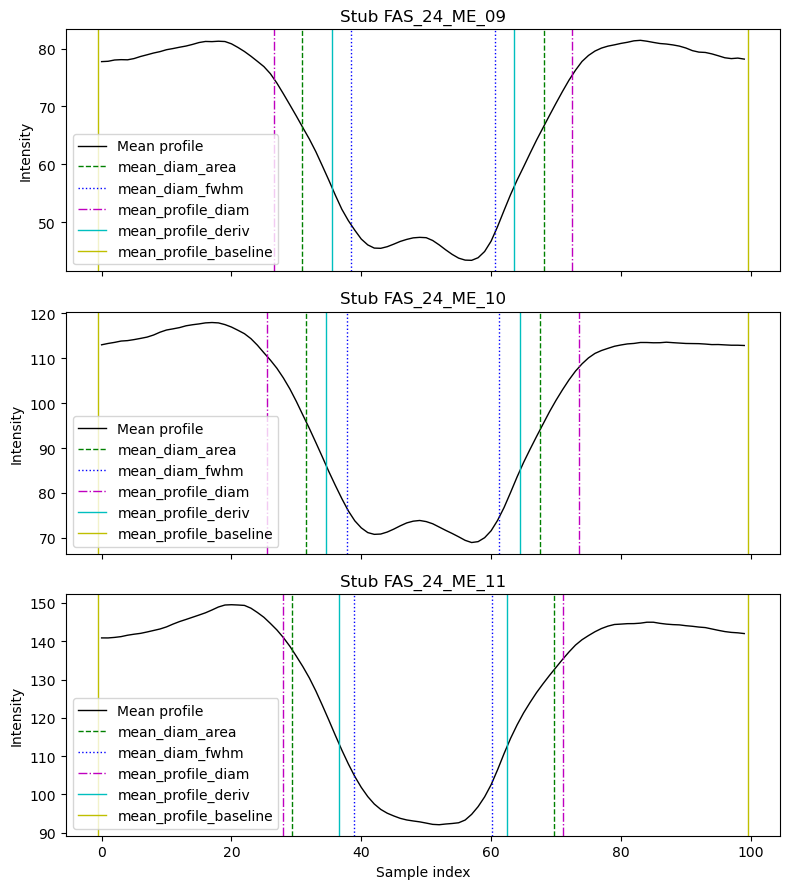

In [7]:
# Visualize mean profile and diameter estimates per stub
rows = all_summary_df.dropna(subset=["mean_profile"]).copy()
if rows.empty:
    raise ValueError("No mean profiles available in summary")

nrows = len(rows)
fig, axes = plt.subplots(nrows, 1, figsize=(8, 3 * nrows), sharex=True)
if nrows == 1:
    axes = [axes]

for ax, (_, row) in zip(axes, rows.iterrows()):
    profile = row["mean_profile"]
    if profile is None:
        continue

    x = np.arange(len(profile))
    center = (len(profile) - 1) / 2

    ax.plot(profile, color="k", linewidth=1, label="Mean profile")

    step_px = row.get("mean_profile_step")
    px_size = row.get("mean_pixel_size")

    if pd.notna(step_px) and pd.notna(px_size):
        if pd.notna(row.get("mean_diameter_area")):
            half = (row["mean_diameter_area"] / (step_px * px_size)) / 2
            ax.axvline(center - half, color="g", linestyle="--", linewidth=1, label="mean_diam_area")
            ax.axvline(center + half, color="g", linestyle="--", linewidth=1)

        if pd.notna(row.get("mean_diameter_fwhm")):
            half = (row["mean_diameter_fwhm"] / (step_px * px_size)) / 2
            ax.axvline(center - half, color="b", linestyle=":", linewidth=1, label="mean_diam_fwhm")
            ax.axvline(center + half, color="b", linestyle=":", linewidth=1)

        if pd.notna(row.get("mean_profile_diameter")):
            half = (row["mean_profile_diameter"] / (step_px * px_size)) / 2
            ax.axvline(center - half, color="m", linestyle="-.", linewidth=1, label="mean_profile_diam")
            ax.axvline(center + half, color="m", linestyle="-.", linewidth=1)

        if pd.notna(row.get("mean_profile_diameter_deriv")):
            half = (row["mean_profile_diameter_deriv"] / (step_px * px_size)) / 2
            ax.axvline(center - half, color="c", linestyle="-", linewidth=1, label="mean_profile_deriv")
            ax.axvline(center + half, color="c", linestyle="-", linewidth=1)

        if pd.notna(row.get("mean_profile_diameter_baseline")):
            half = (row["mean_profile_diameter_baseline"] / (step_px * px_size)) / 2
            ax.axvline(center - half, color="y", linestyle="-", linewidth=1, label="mean_profile_baseline")
            ax.axvline(center + half, color="y", linestyle="-", linewidth=1)

    ax.set_title(f"Stub {row['stub']}")
    ax.set_ylabel("Intensity")
    ax.legend(loc="best")

axes[-1].set_xlabel("Sample index")
plt.tight_layout()
plt.show()

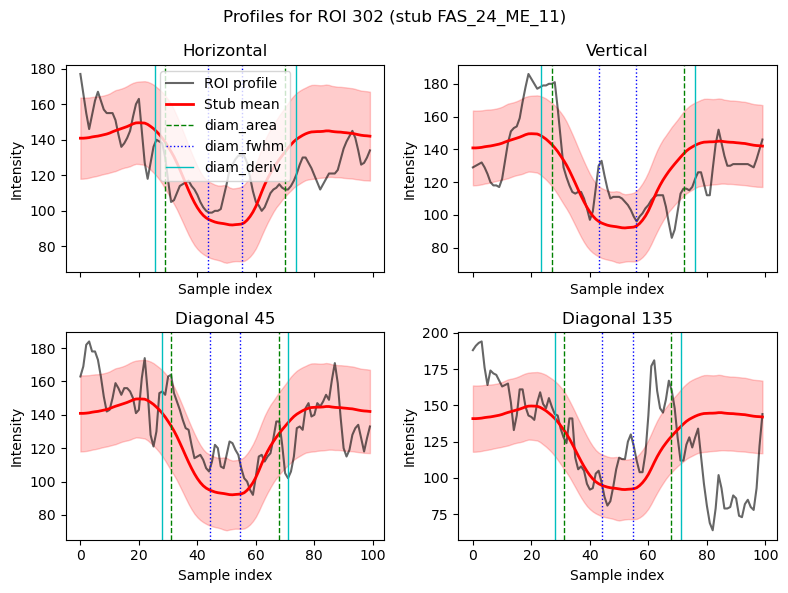

In [9]:
# Visualize profiles for a selected ROI (with global mean for the stub)
profile_stub = stubs[2]

rois_stub = all_rois_df[all_rois_df["stub"] == profile_stub].copy()
if rois_stub.empty:
    raise ValueError(f"No ROIs found for stub {profile_stub}")

roi_id = int(rois_stub["roi_id"].iloc[301])  # change this to any ROI id
roi_row = rois_stub[rois_stub["roi_id"] == roi_id].iloc[0]

payload, masks = load_segmentation(DATAFOLDER, profile_stub)

profiles = {
    "Horizontal": roi_row["profile_h"],
    "Vertical": roi_row["profile_v"],
    "Diagonal 45": roi_row["profile_d45"],
    "Diagonal 135": roi_row["profile_d135"],
}

mean_profiles = [p for p in rois_stub["profile_mean"] if p is not None]
if mean_profiles:
    global_mean = np.mean(np.vstack(mean_profiles), axis=0)
    global_std = np.std(np.vstack(mean_profiles), axis=0)
else:
    global_mean = None
    global_std = None

single_mask = masks == roi_id
ys, xs = np.nonzero(single_mask)
if ys.size == 0 or xs.size == 0:
    raise ValueError(f"ROI id {roi_id} has no pixels")

x_min, x_max = xs.min(), xs.max()
y_min, y_max = ys.min(), ys.max()
mask_width = x_max - x_min
mask_height = y_max - y_min

margin_pixels = 10
num_samples = len(next(p for p in profiles.values() if p is not None))

length_h = mask_width + 2 * margin_pixels
length_v = mask_height + 2 * margin_pixels
length_d = np.sqrt(mask_width ** 2 + mask_height ** 2) + 2 * margin_pixels

step_h = length_h / (num_samples - 1)
step_v = length_v / (num_samples - 1)
step_d = length_d / (num_samples - 1)

pixel_size = float(roi_row["pixel_size"])
diam_area_px = float(roi_row["diameter_area"]) / pixel_size

diam_fwhm = roi_row.get("diameter_fwhm")
diam_fwhm_px = float(diam_fwhm) / pixel_size if pd.notna(diam_fwhm) else np.nan

diam_deriv = roi_row.get("diameter_deriv")
diam_deriv_px = float(diam_deriv) / pixel_size if pd.notna(diam_deriv) else np.nan

diam_baseline = roi_row.get("diameter_baseline")
diam_baseline_px = float(diam_baseline) / pixel_size if pd.notna(diam_baseline) else np.nan

fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True)
axes = axes.ravel()

for ax, (name, profile) in zip(axes, profiles.items()):
    if profile is None:
        ax.set_title(f"{name} (missing)")
        ax.axis("off")
        continue

    if name == "Horizontal":
        step = step_h
    elif name == "Vertical":
        step = step_v
    else:
        step = step_d

    x = np.arange(len(profile))
    center = (len(profile) - 1) / 2

    ax.plot(profile, color="k", alpha=0.6, label="ROI profile")
    if global_mean is not None:
        ax.plot(global_mean, color="r", linewidth=2, label="Stub mean")
        ax.fill_between(x, global_mean - global_std, global_mean + global_std, color="r", alpha=0.2)

    if np.isfinite(diam_area_px):
        half = (diam_area_px / 2) / step
        ax.axvline(center - half, color="g", linestyle="--", linewidth=1, label="diam_area")
        ax.axvline(center + half, color="g", linestyle="--", linewidth=1)

    if np.isfinite(diam_fwhm_px):
        half = (diam_fwhm_px / 2) / step
        ax.axvline(center - half, color="b", linestyle=":", linewidth=1, label="diam_fwhm")
        ax.axvline(center + half, color="b", linestyle=":", linewidth=1)

    if np.isfinite(diam_deriv_px):
        half = (diam_deriv_px / 2) / step
        ax.axvline(center - half, color="c", linestyle="-", linewidth=1, label="diam_deriv")
        ax.axvline(center + half, color="c", linestyle="-", linewidth=1)

    if np.isfinite(diam_baseline_px):
        half = (diam_baseline_px / 2) / step
        ax.axvline(center - half, color="y", linestyle="-", linewidth=1, label="diam_baseline")
        ax.axvline(center + half, color="y", linestyle="-", linewidth=1)

    ax.set_title(name)

fig.suptitle(f"Profiles for ROI {roi_id} (stub {profile_stub})", y=0.98)
for ax in axes:
    ax.set_xlabel("Sample index")
    ax.set_ylabel("Intensity")

axes[0].legend(loc="best")
plt.tight_layout()
plt.show()

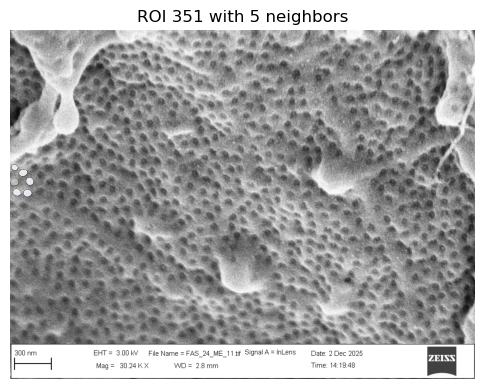

In [13]:
# Visualize one ROI and its nearest neighbors over the original image
viz_stub = stubs[2]  # change this to any stub

payload, masks = load_segmentation(DATAFOLDER, viz_stub)
pixel_size = get_pixel_size(DATAFOLDER, viz_stub)
centroids_df = compute_centroids_df(masks, pixel_size, stub=viz_stub)
centroids_df, dists = compute_neighbor_stats(centroids_df, max_k=10)

roi_id = int(centroids_df["roi_id"].iloc[350])  # change this to any ROI id

coords = centroids_df[["centroid_x", "centroid_y"]].to_numpy()
roi_ids_all = centroids_df["roi_id"].to_numpy()

roi_index = np.where(roi_ids_all == roi_id)[0]
if roi_index.size == 0:
    raise ValueError(f"ROI id {roi_id} not found")
roi_index = roi_index[0]

dist_row = dists[roi_index]

# Get the nearest neighbors for this ROI
order = np.argsort(dist_row)
order = order[order != roi_index]

n = int(centroids_df.loc[roi_index, "neighbor_count"])
neighbor_indices = order[:n]

# Build a label mask for display
mask_main = (masks == roi_id)
mask_neighbors = np.isin(masks, roi_ids_all[neighbor_indices])

# Read the original image and pick a 2D plane if needed
raw = tifffile.imread(DATAFOLDER / f"{viz_stub}.tif")
image = raw[0] if raw.ndim > 2 else raw

# Mask background so only ROI pixels are drawn
neighbors_masked = np.ma.masked_where(~mask_neighbors, mask_neighbors)
main_masked = np.ma.masked_where(~mask_main, mask_main)

plt.figure(figsize=(6, 6))
plt.imshow(image, cmap="gray")
plt.imshow(neighbors_masked, cmap="Blues", alpha=0.9)
plt.imshow(main_masked, cmap="Reds", alpha=0.6)
plt.title(f"ROI {roi_id} with {n} neighbors")
plt.axis("off")
plt.show()

In [32]:
test = Path("F:\Jaime\seg_npy\FAS7\ME\FAS_7_ME_overview01_seg.npy")

np.load(test, allow_pickle=True)


EOFError: No data left in file